<a href="https://colab.research.google.com/github/RiseAboveAll/HealthCare/blob/master/HealthCare_SkillUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Prerequisites :</h2>

- Use Google Colab

- Basic understanding of Machine Learning Models, Gradient Descent

- Understanding of Python

<h2>Level & Duration</h2>

- Level : Intermediate

- Duration : 180 minutes


To know how to setup Google Colab please read the article shared : [Google Colab Setup](https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c)

### Problem Statement

Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.



MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp). 


MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.


One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.


**The Process:**

  1. MedCamp employees / volunteers reach out to people and drive registrations.

  2. During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.

**Other things to note:**
  
  1. Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.

  2. For a few camps, there was hardware failure, so some information about date and time of registration is lost.

  3. MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.

**Target Variable**

Favorable outcome:

  1. For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.

  2. You need to predict the whether person registering for camp will attend the camp or not .


#### Data Description

- Data Dictionary - File contains description about the columns in each of the csv file. https://github.com/RiseAboveAll/HealthCare/blob/master/Data_Dictionary.xlsx 


- Health_Camp_Detail.csv – File containing Health_Camp_Id, Camp_Start_Date, Camp_End_Date and Category details of each camp. https://raw.githubusercontent.com/RiseAboveAll/HealthCare/master/Health_Camp_Detail.csv

- Train.csv – File containing registration details for all the test camps. This includes Patient_ID, Health_Camp_ID, Registration_Date and a few anonymized variables as on registration date. https://raw.githubusercontent.com/RiseAboveAll/HealthCare/master/Train.csv

- Patient_Profile.csv – This file contains Patient profile details like Patient_ID, Online_Follower, Social media details, Income, Education, Age, First_Interaction_Date, City_Type and Employer_Category https://raw.githubusercontent.com/RiseAboveAll/HealthCare/master/Patient_Profile.csv

- First_Health_Camp_Attended.csv – This file contains details about people who attended health camp of first format. This includes Donation (amount) & Health_Score of the person. https://raw.githubusercontent.com/RiseAboveAll/HealthCare/master/First_Health_Camp_Attended.csv

- Second_Health_Camp_Attended.csv - This file contains details about people who attended health camp of second format. This includes Health_Score of the person. https://raw.githubusercontent.com/RiseAboveAll/HealthCare/master/Second_Health_Camp_Attended.csv

- Third_Health_Camp_Attended.csv - This file contains details about people who attended health camp of third format. This includes Number_of_stall_visited & Last_Stall_Visited_Number. https://raw.githubusercontent.com/RiseAboveAll/HealthCare/master/Third_Health_Camp_Attended.csv 

<h2>Data Description</h2>


### Information on XGBOOST installation

An alternate way to install XGBoost if you cannot use pip or you want to run the latest code from GitHub requires that you make a clone of the XGBoost project and perform a manual build and installation.

For example to build XGBoost without multithreading on Mac OS X (with GCC already installed via macports or homebrew), you can type:

```

git clone --recursive https://github.com/dmlc/xgboost
cd xgboost
cp make/minimum.mk ./config.mk
make -j4
cd python-package
sudo python setup.py install

```

### Installing and Importing Libraries

**This project has been developed using packages version as shared below :**

- lightgbm==2.2.3

- matplotlib==3.2.2

- numpy==1.18.5

- pandas==1.1.0

- scikit-learn==0.22.2.post1

- sklearn==0.0

- xgboost==0.90

In [ ]:
!pip3 install xgboost

In [105]:
import pandas as pd
import numpy as np 
import re
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from pandas.testing import assert_frame_equal
from sklearn.model_selection import GridSearchCV

### Importing Files For Merging and Creating Final Training Dataset

Q1) Import the following .csv files in the dataframe :

1. First_Health_Camp_Attended

2. Second_Health_Camp_Attended

3. Third_Health_Camp_Attended

Q2a) In the dataframe having First_Health_Camp_Attended data ,rename column name 'Health_Score' to 'Outcome' . Slice your dataframe with the following columns : 'Patient_ID','Health_Camp_ID','Health_Score'

Q2b) In the dataframe having Second_Health_Camp_Attended data ,rename column name 'Health_Score' to 'Outcome' 

**Since we want to convert our outcome variable in terms of binary variable , i.e in terms of 0 and 1 hence we rename 'Number_of_stall_visited' Column as Outcome**

Q2c) In the dataframe having Third_Health_Camp_Attended data ,rename column name 'Health_Score' to 'Outcome' 

Q3) Concatenate above three dataframes together in new dataframe and name the dataframe as all_camps ?



**Since all the patients in all_camps dataframe are those who have visited the counter to know their health score , hence we are marking them as 1 in the Outcome variable**

Q4) Assign the Outcome variable of all_camps dataframe with value 1?

Hint :

```

all_camps['Outcome']=1

```


Q5) Check is there any NaN values in the all_camps dataframe?

Hint: use .isna().sum() method 

Q6) Import Train.csv in dataframe name train?

### Merge Train data with all_camps data

Q7 Join train dataframe with all_camps on basis of 'Patient_ID','Health_Camp_ID'? Also fill NaNs present in the Outcome variable with 0 ?

Hint: 

```
train = train.merge(all_camps, on=['Patient_ID','Health_Camp_ID'], how='left')
train['Outcome'] = train['Outcome'].fillna(0).astype('int')
```

Save your merged dataframe as csv , name the csv file as : train_with_outcome.csv

In [26]:
train.to_csv(data_path+'train_with_outcome.csv', index=False)

**Our  Training Data is prepared now , we will use train_with_outcome.csv for training the model**

Q7a) Load the train_with_outcome.csv in new dataframe , name it as Final_Train

Hint:
```
Final_Train=pd.read_csv(data_path+'train_with_outcome.csv')
```

### Finding Anomaly

-  **Reason to replace NaN's to 0 is , the NaNs are present because these registrants have not attended or went to any stalls for awareness or getting health checkup. If you check the number of frequency for Outcome = 0 , it is same as the number of missing values**

Q8) Find NaNs in the Final_Train dataframe? Use .isna().sum() method

### Data Prepration

Q9) Drop NaNs present in Registration_Date column?

Hint :

```

idx=Final_Train[Final_Train['Registration_Date'].isna()==True].index

Final_Train.drop(idx,axis=0,inplace=True)

```

Q10) Convert Registration_Date column to date & time object?

Hint : use pd.to_datetime() function

Q11) To find repetition of patients to the health camp plot the bar plot for First 10 value counts of Patient_ID column of the merged dataframe?

Q11a)To see the ratio of new attendees to repetative attendees, Use the above plot and stack the bar plots as per the Outcome. For Outcome==0 , barplot color should be red & for Outcome==1 , barplot color should be green.

Hint : 

```


Final_Train.Patient_ID[Final_Train.Outcome==0].value_counts().value_counts()[:10].plot(kind='bar',color='r')
Final_Train.Patient_ID[Final_Train.Outcome==1].value_counts().value_counts()[:10].plot(kind='bar',color='g')

```



### Getting patient details and merging with train

Q12) Load Patient_Profile.csv in dataframe and name it as patient. Convert the 'First_Interaction' variable to Date and Time variable.

Hint: 
```
patient = pd.read_csv(data_path + "Patient_Profile.csv", na_values=['None',''])
#Convert First_Interactoion column to date & time object
patient['First_Interaction'] = pd.to_datetime(patient['First_Interaction'], format="%d-%b-%y")
```

Q12a) Perform a left join for Final_Train dataframe with patient dataframe on Patient ID column?

### Getting health camp details and merging with train

Q13) Load Health_Camp_Detail.csv in a dataframe?

Q13a) Convert Camp_Start_Date and Camp_End_Date to datetime object?

Q13b) Create a new Feature Camp_Duration_Days by subtracting Camp_Start_Date from Camp_End_Date?

Hint :

```
hc['Camp_Duration_Days'] = (hc['Camp_End_Date'] - hc['Camp_Start_Date']).dt.days

```


Q13c) Perform a left join on Final_Train with Health_Camp_Detail dataframe on Health_Camp_ID?

This is your final prepared data , now we are left with anomaly treatement if any, feature creation.

### Filling NA with -99 ##

Q14) Find NaNs in Final_Train dataframe and fill NaNs using .fillna() method with value of -99?

###  Create additional features 

Q15a)To know when did the attendee registered for the camp , i.e prior to start of camp or post start, create a new feature Diff_CampStart_Registration by subtracting Registration_Date from Camp_Start_Date ?

Hint: 

```
Final_Train["Diff_CampStart_Registration"] = (Final_Train["Camp_Start_Date"] - Final_Train["Registration_Date"]).dt.days
```

In [45]:
# When did the attendee registered before the camp started or post camp started


Q15b)To know how many days in advance did the attendee registered from the ending date of camp , create a new feature Diff_CampEnd_Registration by subtracting Registration_Date from Camp_End_Date ?

Hint: 

```
Final_Train["Diff_CampEnd_Registration"] = (Final_Train["Camp_End_Date"] - Final_Train["Registration_Date"]).dt.days

```

In [46]:
# Did Attendee booked in advance for the camp or how many days earlier did he or she booked for it


Q15c)To know when was first interaction was made with the attendee , create a new feature Diff_Registration_FirstInteraction by subtracting First_Interaction from Registration_Date ?

Hint: 

```
Final_Train["Diff_Registration_FirstInteraction"] = (Final_Train["Registration_Date"] - Final_Train["First_Interaction"]).dt.days

```

In [47]:
# When was the first interaction post registration 


Q15c)To know when was first interaction was made with the attendee post the start of the camp , create a new feature Diff_CampStart_FirstInteraction by subtracting First_Interaction from Registration_Date ?

Hint: 

```
Final_Train["Diff_CampStart_FirstInteraction"] = (Final_Train["Camp_Start_Date"] - Final_Train["First_Interaction"]).dt.days

```

In [48]:
# How many days it had been for first interaction post camp start


#### Performing LabelEncoding for all the categorical column

In [49]:
## Getitng the cat columns and label encode them ##
cat_columns = []
for col in Final_Train.columns:
	if Final_Train[col].dtype == 'object':
		print(col)
		cat_columns.append(col)
		enc = preprocessing.LabelEncoder()
		full_list = list(Final_Train[col].values) 
		enc.fit(full_list)
		Final_Train[col] = enc.transform(list(Final_Train[col].values))
		

City_Type
Employer_Category
Category1
Category2


To calculate number of times the attendee has attended the camp

In [50]:
grouped_df=Final_Train.groupby("Patient_ID",as_index=False).agg('size').reset_index()
grouped_df.columns=["Patient_ID","var_count"]
merged_df=pd.merge(Final_Train,grouped_df,how="left",on="Patient_ID")
merged_df.fillna(-1,inplace=True)

In [51]:
merged_df.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration_Days,Diff_CampStart_Registration,Diff_CampEnd_Registration,Diff_Registration_FirstInteraction,Diff_CampStart_FirstInteraction,var_count
0,489652,6578,2005-09-10,4,0,0,0,2,1,0,0,0,0,-99.0,-99.0,-99.0,2004-12-06,0,0,2005-08-16,2005-10-14,2,6,2,59,-25,34,278,253,10
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,0,1.0,75.0,40.0,2004-09-08,3,8,2005-08-16,2005-10-14,2,6,2,59,-2,57,344,342,18
2,523729,6534,2006-04-29,0,0,0,0,0,1,0,0,0,0,-99.0,-99.0,-99.0,2004-06-22,0,0,2005-10-17,2007-11-07,1,0,2,751,-194,557,676,482,5
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,0,-99.0,-99.0,-99.0,2004-02-07,9,0,2004-02-01,2004-02-18,0,4,2,17,-6,11,0,-6,5
4,521364,6529,2006-02-28,15,1,0,0,7,1,0,0,0,1,1.0,70.0,40.0,2003-07-04,9,12,2006-03-30,2006-04-03,1,0,2,4,30,34,970,1000,17


In [ ]:
merged_df.shape

(74944, 30)

In [52]:

Final_Train = Final_Train.sort_values(['Camp_Start_Date', 'Camp_End_Date', 'Patient_ID']).reset_index(drop=True)

In [53]:
Final_Train.shape

(74944, 29)

### Data Prepration Part 2

Perform right join on Final_Train with  merged_df[['Patient_ID','Health_Camp_ID','var_count']] ,on 'Patient_ID','Health_Camp_ID' . (It will add the new var_count column)

In [54]:
Ftrain=Final_Train.merge(merged_df[['Patient_ID','Health_Camp_ID','var_count']],on=['Patient_ID','Health_Camp_ID'],how='right')

In [55]:
Ftrain.shape

(74944, 30)

Q16) Plot barplot for first 15 value counts for 'var_count' variable?

Hint: 

```
Ftrain.var_count.value_counts()[:15].plot(kind='bar')

```

Creating a new feature customer_type, where 1 means Repeatng Patient & 0 means New Patient 

In [57]:
# 1 -> Repeating Patient ; 0-> New Patientt
Ftrain['customer_type']=np.NaN
Ftrain.loc[Ftrain.var_count==1,'customer_type']=0
Ftrain.loc[Ftrain.var_count>1,'customer_type']=1

In [ ]:
Ftrain['customer_type'].value_counts()

1.0    59263
0.0    15681
Name: customer_type, dtype: int64

Q17) Drop 'var_count' variable from Ftrain dataframe?

Q18) To understand have attendees registered post start of camp ,plot bar plot for first 10 value counts for Diff_CampStart_Registration.

Hint:

```
Ftrain['Diff_CampStart_Registration'].value_counts()[:10].plot(kind='bar')
```

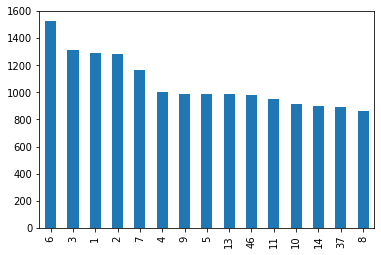

In [60]:
Final_Train["Diff_CampEnd_Registration"].value_counts()[:15].plot(kind='bar')

We can see there are people who have registered even 1 day before the camp ending day 

Creating a New Feature Registration_Type , 1 means Registered post start of camp, 0 means pre-starting of camp

In [61]:
# Registration 1- post start of camp ; 0- pre starting of camp
Ftrain['Registration_Type']=np.NaN
Ftrain.loc[Ftrain['Diff_CampStart_Registration']<=0,'Registration_Type']=1
Ftrain.loc[Ftrain['Diff_CampStart_Registration']>0,'Registration_Type']=0

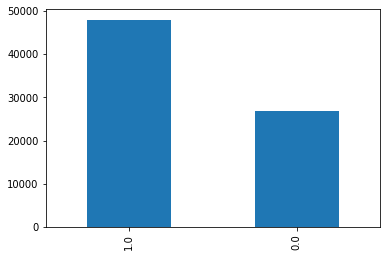

In [62]:
Ftrain['Registration_Type'].value_counts().plot(kind='bar')

We can see there are atleast twice the attendees who have registered after the camp has started

Q19) To understand first interaction with attendees ,plot bar plot for first 10 value counts for Diff_Registration_FirstInteraction.

We see most of them had same day first interaction when they registered

Q20) To understand first interaction with attendees ,plot bar plot for first 10 value counts for Diff_CampStart_FirstInteraction.

Create new Feature Interaction Type where 1 means Interaction Post camp started and 0 means pre camp started

In [65]:
# Interaction Type 1-> Post Camp Started ; 0 -> Pre camp started
Ftrain['Interaction_Type']=np.NaN
Ftrain.loc[Final_Train["Diff_CampStart_FirstInteraction"]<=0,'Interaction_Type']=1
Ftrain.loc[Final_Train["Diff_CampStart_FirstInteraction"]>0,'Interaction_Type']=0

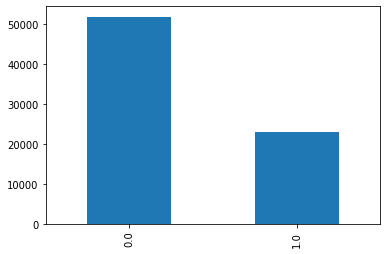

In [66]:
Ftrain['Interaction_Type'].value_counts().plot(kind='bar')

We can see most of the people approximately twice the attendees had their first interaction befor camp start day

Q21) Drop the following columns from the Ftrain data frame: 

'Diff_CampStart_FirstInteraction','Diff_Registration_FirstInteraction','Diff_CampEnd_Registration','Diff_CampStart_Registration','Registration_Date', 'Camp_Start_Date','Camp_End_Date','First_Interaction','Patient_ID','Health_Camp_ID'

Use inplace parameter in .drop() function and set it as true

Hint:

```
X.drop(['column1','column2'],axis=1,inplace=True)
```

### Normalize Data

In [69]:
# This Function Removes the Outlier
def outlier(Ftrain,col):
    IQR=Ftrain[col].quantile(.75)-Ftrain[col].quantile(.25)
    upper_bound=Ftrain[col].quantile(.75) + ( 1.5 * IQR)
    lower_bound=Ftrain[col].quantile(.25) - ( 1.5 * IQR)
    Ftrain[col].clip(lower=lower_bound,upper=upper_bound,inplace=True)

In [ ]:
sns.boxplot(Ftrain.Camp_Duration_Days)

In [71]:
outlier(Ftrain,'Camp_Duration_Days')

In [ ]:
sns.boxplot(Ftrain.Camp_Duration_Days)

In [74]:
#Perform normalization of continuous variable
num_col=['Var1','Var2','Var3','Var4','Var5','Education_Score','Age','Camp_Duration_Days']
norm=preprocessing.Normalizer().fit_transform(Ftrain[num_col])
norm=pd.DataFrame(norm,columns=num_col)
Ftrain.drop(num_col,axis=1,inplace=True)
Ftrain=pd.concat([Ftrain,norm],axis=1)

### Splitting the Data Set

In [77]:
#Segregating Independent variable and Dependent Variable
X_Data=Ftrain.drop('Outcome',axis=1)
y_data=Ftrain[['Outcome']]

In [78]:
X_Data.shape

(74944, 21)

Q22)Using train_test_split spilt the data set in ratio of 80:20?

Use random_state parameter and set its value as 2

Hint:

```
X_train,X_test,y_train,y_test=tts(X,y,test_size=.20,random_state=2)
```

### Important Feature Selection & Decision Tree as Base Model

1. Feature Importance using Decision Tree attribute feature_importances_

In [80]:
Feature_Selection_clf=DTC(criterion='gini').fit(X_train,y_train)

In [82]:
cols=X_train.columns
impo=Feature_Selection_clf.feature_importances_
Feature_Importance=pd.DataFrame(cols,columns=['Columns'])
Feature_Importance['Importance']=impo

In [ ]:
Feature_Importance

2. Feature Importance using RFE

In [ ]:
Feature_Selection_clf=DTC(criterion='gini')
rfe = RFE(Feature_Selection_clf, 3)
rfe = rfe.fit(X_train, y_train.values.ravel())
# print summaries for the selection of attributes
print(X_train.columns)
print(rfe.ranking_)

In [92]:
imp_cols=X_train.loc[:,rfe.support_==True].columns.values

In [93]:
selected_data=X_train[imp_cols]

In [94]:
clf=DTC(criterion='entropy').fit(selected_data,y_train)

In [95]:
y_pred=clf.predict(selected_data)

In [ ]:
#Create Classification Report
print(classification_report(y_train,y_pred))

In [97]:
selected_data_t=X_test[imp_cols]

In [98]:
y_pred_t=clf.predict(selected_data_t)

In [ ]:
print(classification_report(y_test,y_pred_t))

**We see there is overfitting in te model as accuracy over training data was .84 and on test data it is .78**

### XGBOOST

- XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

**What is XGBOOST?**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

Evolution of tree-based algorithms over the years :


![alt text](https://miro.medium.com/max/700/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg)

The algorithm differentiates itself in the following ways:

- A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

- Portability: Runs smoothly on Windows, Linux, and OS X.

- Languages: Supports all major programming languages including C++, Python, R, Java, Scala, and Julia.

- Cloud Integration: Supports AWS, Azure, and Yarn clusters and works well with Flink, Spark, and other ecosystems.

**How to build an intuition for XGBoost?**

Imagine that you are a hiring manager interviewing several candidates with excellent qualifications. Each step of the evolution of tree-based algorithms can be viewed as a version of the interview process.


- **Decision Tree**: Every hiring manager has a set of criteria such as education level, number of years of experience, interview performance. A decision tree is analogous to a hiring manager interviewing candidates based on his or her own criteria.

- **Bagging**: Now imagine instead of a single interviewer, now there is an interview panel where each interviewer has a vote. Bagging or bootstrap aggregating involves combining inputs from all interviewers for the final decision through a democratic voting process.

- **Random Forest**: Every interviewer will only test the interviewee on certain randomly selected qualifications (e.g. a technical interview for testing programming skills and a behavioral interview for evaluating non-technical skills).

- **Boosting**: This is an alternative approach where each interviewer alters the evaluation criteria based on feedback from the previous interviewer. This ‘boosts’ the efficiency of the interview process by deploying a more dynamic evaluation process.

- **Gradient Boosting**: A special case of boosting where errors are minimized by gradient descent algorithm e.g. the strategy consulting firms leverage by using case interviews to weed out less qualified candidates.

- **XGBoost**: Think of XGBoost as gradient boosting on ‘steroids’ (well it is called ‘Extreme Gradient Boosting’ for a reason!). It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.

**Why does XGBoost perform so well?**

XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.

![alt text](https://miro.medium.com/max/700/1*FLshv-wVDfu-i54OqvZdHg.png)

- **System Optimization:**

  1. Parallelization: XGBoost approaches the process of sequential tree building using parallelized implementation. This is possible due to the interchangeable nature of loops used for building base learners; the outer loop that enumerates the leaf nodes of a tree, and the second inner loop that calculates the features. This nesting of loops limits parallelization because without completing the inner loop (more computationally demanding of the two), the outer loop cannot be started. Therefore, to improve run time, the order of loops is interchanged using initialization through a global scan of all instances and sorting using parallel threads. This switch improves algorithmic performance by offsetting any parallelization overheads in computation.

  2. Tree Pruning: The stopping criterion for tree splitting within GBM framework is greedy in nature and depends on the negative loss criterion at the point of split. XGBoost uses ‘max_depth’ parameter as specified instead of criterion first, and starts pruning trees backward. This ‘depth-first’ approach improves computational performance significantly.

**Algorithmic Enhancements:**

  1. Regularization: It penalizes more complex models through both LASSO (L1) and Ridge (L2) regularization to prevent overfitting.

  2. Sparsity Awareness: XGBoost naturally admits sparse features for inputs by automatically ‘learning’ best missing value depending on training loss and handles different types of sparsity patterns in the data more efficiently.

  3. Weighted Quantile Sketch: XGBoost employs the distributed weighted Quantile Sketch algorithm to effectively find the optimal split points among weighted datasets.

  4. Cross-validation: The algorithm comes with built-in cross-validation method at each iteration, taking away the need to explicitly program this search and to specify the exact number of boosting iterations required in a single run.

It is not that we start with XGBOOST.

When it comes to Machine Learning, there is no free lunch. We must test all possible algorithms for data at hand to identify the best algorithm. Besides, picking the right algorithm is not enough. We must also choose the right configuration of the algorithm for a dataset by tuning the hyper-parameters. Furthermore, there are several other considerations for choosing the winning algorithm such as computational complexity, explainability, and ease of implementation. This is exactly the point where Machine Learning starts drifting away from science towards art, but honestly, that’s where the magic happens!

Hyperparameters of XGBClassifier:

- eta [default=0.3, alias: learning_rate] :

Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative. It ranges between 0 & 1

- gamma [default=0]

Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

- max_depth [default=6]

Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 is only accepted in lossguided growing policy when tree_method is set as hist and it indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree.

- max_delta_step [default=0]

Maximum delta step we allow each leaf output to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative. Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced. Set it to value of 1-10 might help control the update.

range: [0,∞]



### XGBOOST without Important Features 

Q23) Create XGBOOST Classifier model without feature selection.Present your classification report for both prediction over training set and test set.

(Optional) You can use GridSearchCV to tune hyperparameters like : max_depth,learning_rate,n_estimators

### XGBOOST Model with Important Features

Q24) Using Important Feature Selection as reference, Find Important Features, using them create XGBOOST Classifier Model.

Present Classification Report over Prediction over training data and test data.

**Author** : Himanshu Birla. 